In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from deepjets.models import get_maxout, load_model, save_model
from deepjets.learning import prepare_datasets, test_model, train_model
from keras.optimizers import Adam
from sklearn import cross_validation
from sklearn.metrics import auc, roc_curve
import h5py
import itertools
import matplotlib.pyplot as plt
import numpy as np

Using Theano backend.


In [3]:
model = get_maxout(25**2)

In [4]:
n_images = 10000
n_folds = 1
test_frac = 0.1
val_frac = 0.1
batch_size = 32
sig_file = 'images/w_shrink_1p2.h5'
bkd_file = 'images/qcd_shrink_1p2.h5'
dataset_name = 'datasets/shrink_1p2'
model_name = 'models/maxout_shrink_1p2'

In [5]:
kf_files = prepare_datasets(
    sig_file, bkd_file, dataset_name,
    n_sig=n_images, n_bkd=n_images, test_frac=test_frac, val_frac=val_frac,
    n_folds=n_folds, shuffle=True, shuffle_seed=1)

In [6]:
train_model(model, kf_files['train'], batch_size, model_name=model_name, verbose=2)

Training on 16200 samples, validating on 1800 sample from datasets/shrink_1p2_train.h5
Epoch 1/100...
Epochs w/o increase = 0, AUC = 6.28587135192
Epoch 2/100...
Epochs w/o increase = 0, AUC = 7.22297402601
Epoch 3/100...
Epochs w/o increase = 0, AUC = 20.022082744
Epoch 4/100...
Epochs w/o increase = 1, AUC = 19.8826298542
Epoch 5/100...
Epochs w/o increase = 2, AUC = 19.8226464945
Epoch 6/100...
Epochs w/o increase = 0, AUC = 23.5887045697
Epoch 7/100...
Epochs w/o increase = 1, AUC = 18.3194562625
Epoch 8/100...
Epochs w/o increase = 2, AUC = 20.5920771676
Epoch 9/100...
Epochs w/o increase = 3, AUC = 20.1746757828
Epoch 10/100...
Epochs w/o increase = 4, AUC = 21.3339081993
Epoch 11/100...
Epochs w/o increase = 5, AUC = 19.1517461568
Epoch 12/100...
Epochs w/o increase = 6, AUC = 22.6680704333
Epoch 13/100...
Epochs w/o increase = 7, AUC = 22.8850795008
Epoch 14/100...
Epochs w/o increase = 8, AUC = 22.6204648168
Epoch 15/100...
Epochs w/o increase = 9, AUC = 21.2834442978
Epoch 16

Testing on 2000 samples, dataset from datasets/shrink_1p2_test.h5
Score    = 0.512686077118
AUC      = 29.2608360783
Accuracy = 1516/2000 = 0.758


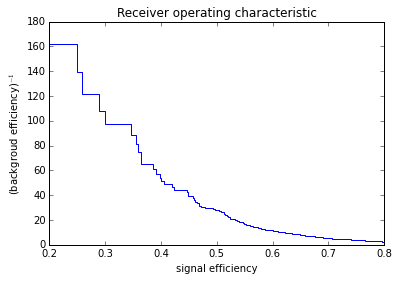

In [9]:
test_model(model, kf_files['test'], batch_size)